<a href="https://colab.research.google.com/github/Danata117/ML/blob/main/ML_Praktika2%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas seaborn scikit-learn
!pip install pandas matplotlib seaborn

# Домашнее задание про практике 2

- Провести разведочный анализ EDA (описать полученный результат). Тут важно, влияет ли X[i] на Y (примеры в практике 2)
- Описать полученный результат относительно анализа целевой перменной и зависимой (см. практика 2)
- Подобороться с пропусками в данных (при наличии в датасете). Объяснить способ выборка борьбы с пропуском
- Обучить модель линейной регресии на всей выборке X, y. Вывести метрики
- Сделать train_test_split и обучить на обучающей выборке. Предсказать результат на обучающей и тестовой выборках. Вывести метрики, объяснить полученный результат

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [31]:
PATH_TO_FILE: str = '/content/drive/MyDrive/student_depression_dataset.csv'
df = pd.read_csv(PATH_TO_FILE)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [33]:
# преобразовать категориальные признаки в category
df['Gender'] = df['Gender'].astype('category')
df['City'] = df['City'].astype('category')
df['Profession'] = df['Profession'].astype('category')
df['Sleep Duration'] = df['Sleep Duration'].astype('category')
df['Dietary Habits'] = df['Dietary Habits'].astype('category')
df['Degree'] = df['Degree'].astype('category')
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].astype('category')
df['Financial Stress'] = df['Financial Stress'].astype('category')
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].astype('category')


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   id                                     27901 non-null  int64   
 1   Gender                                 27901 non-null  category
 2   Age                                    27901 non-null  float64 
 3   City                                   27901 non-null  category
 4   Profession                             27901 non-null  category
 5   Academic Pressure                      27901 non-null  float64 
 6   Work Pressure                          27901 non-null  float64 
 7   CGPA                                   27901 non-null  float64 
 8   Study Satisfaction                     27901 non-null  float64 
 9   Job Satisfaction                       27901 non-null  float64 
 10  Sleep Duration                         27901 non-null  cat

In [35]:
# выбрать целевую переменную и разделить на X, y
# целевая переменная - числовой непрерывный признак

y = df["CGPA"]
X = df.drop(["id", "CGPA"], axis=1)

In [36]:
X.head(n=3)

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0


In [37]:
y.head(n=3)

,CGPA
0,8.97
1,5.90
2,7.03


## EDA (разведочный анализ относительно целевой переменной)

в этом же блоке побороться с проусками, важно сделать именно после разведочного анализа
- Y и категориальные
- Y и числовые
- Описать все полученные результаты в своем блоке

- Отобрать признаки для дальнейшего анализа, записать в ```best_features```

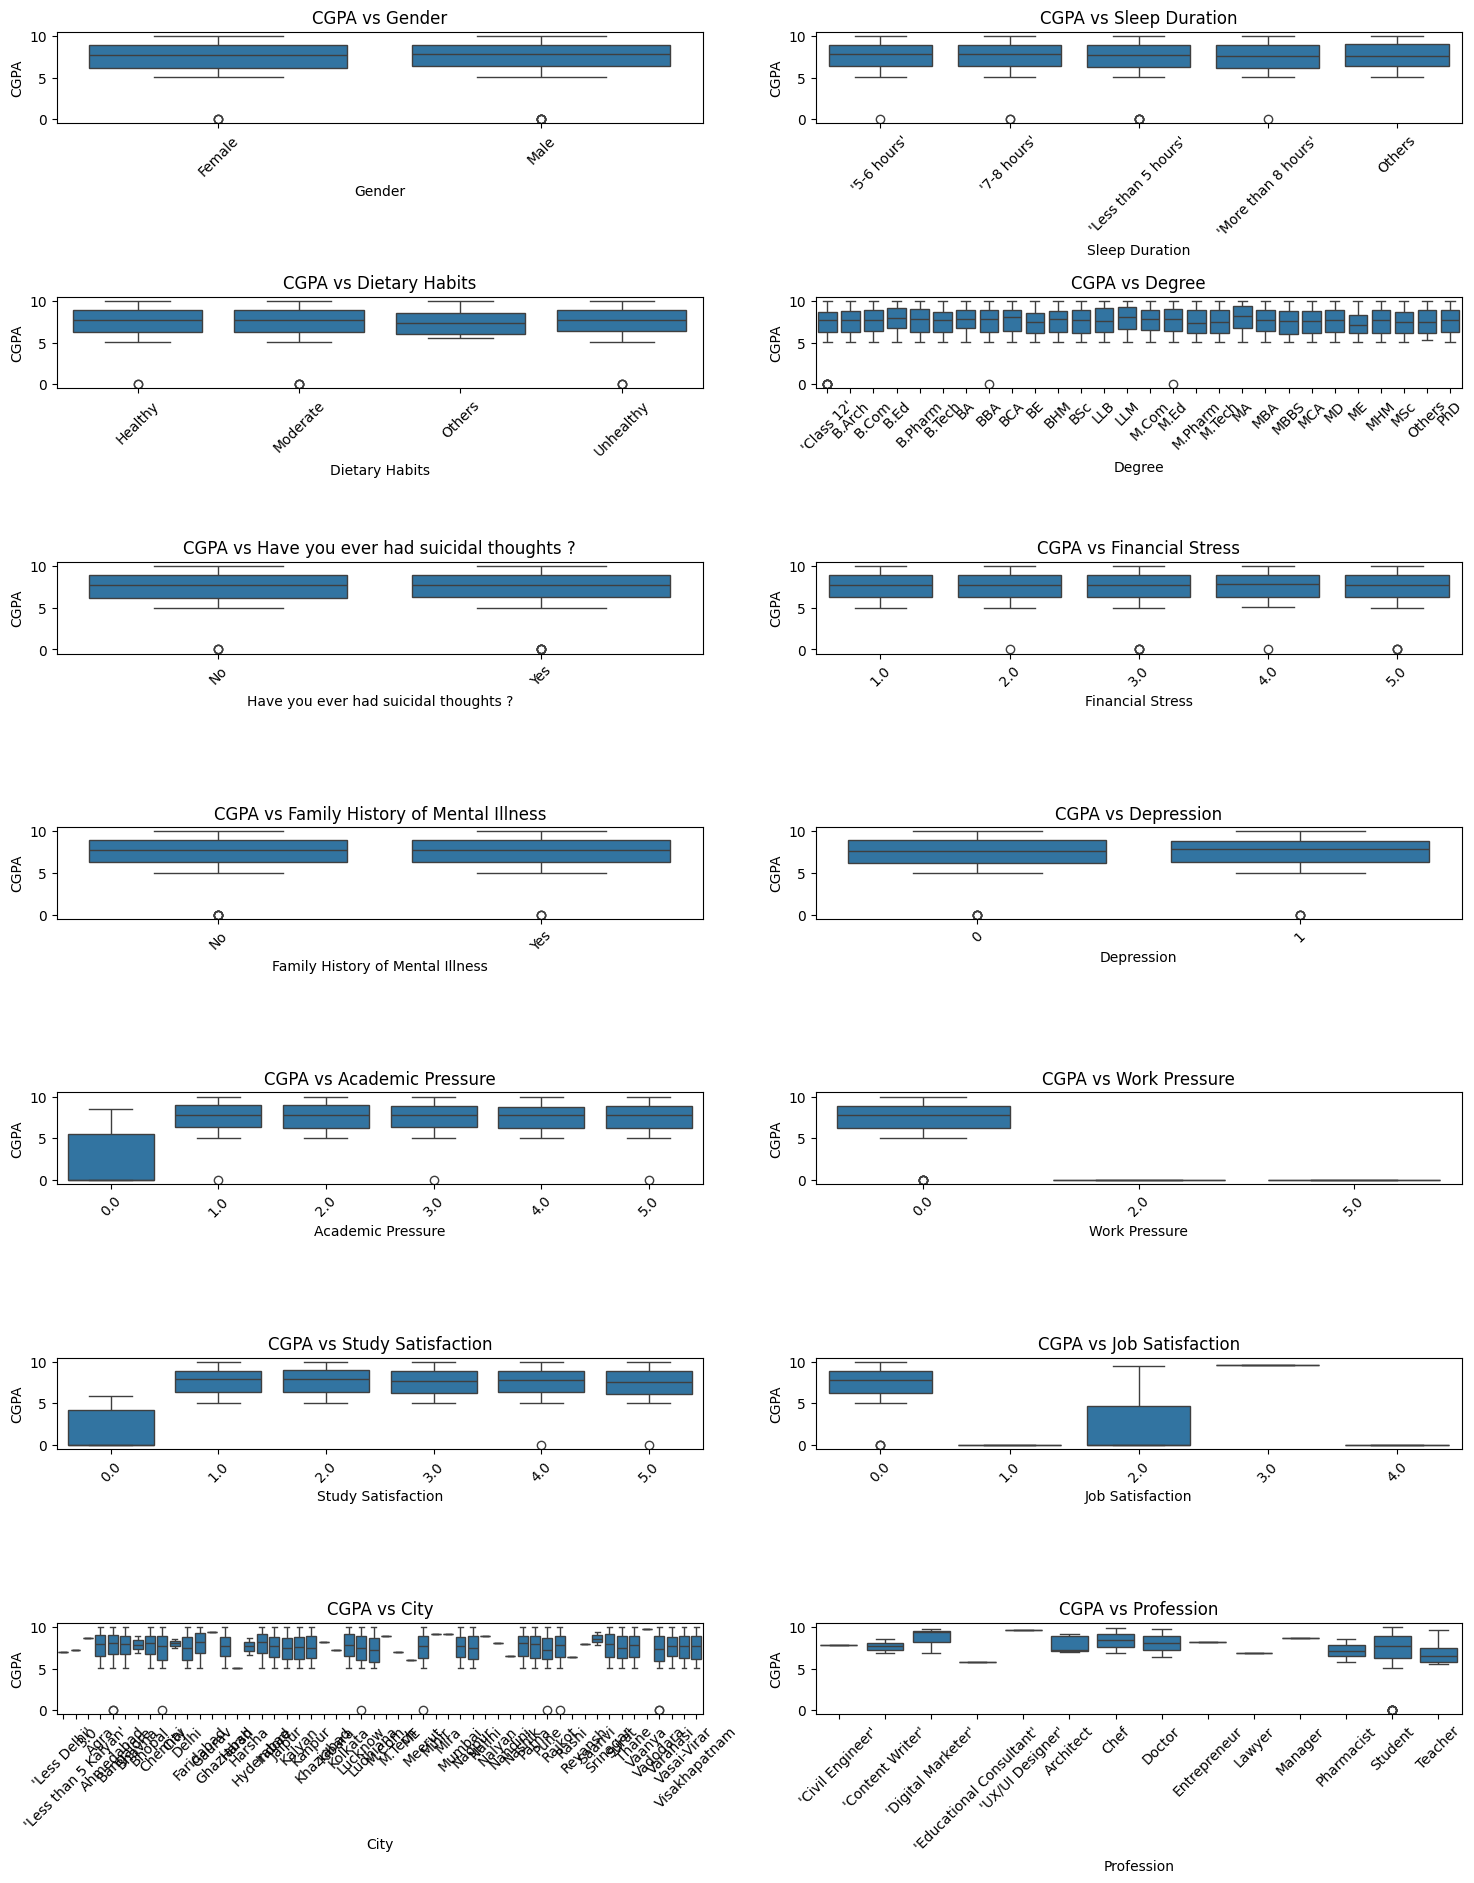

In [73]:
cat_cols = ['Gender', 'Sleep Duration', 'Dietary Habits',
            'Degree', 'Have you ever had suicidal thoughts ?',
            'Financial Stress', 'Family History of Mental Illness', 'Depression', 'Academic Pressure', 'Work Pressure',
            'Study Satisfaction', 'Job Satisfaction','City','Profession']

plt.figure(figsize=(15, 20))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols)//2+1, 2, i)
    sns.boxplot(x=col, y="CGPA", data=df)
    plt.title(f"CGPA vs {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


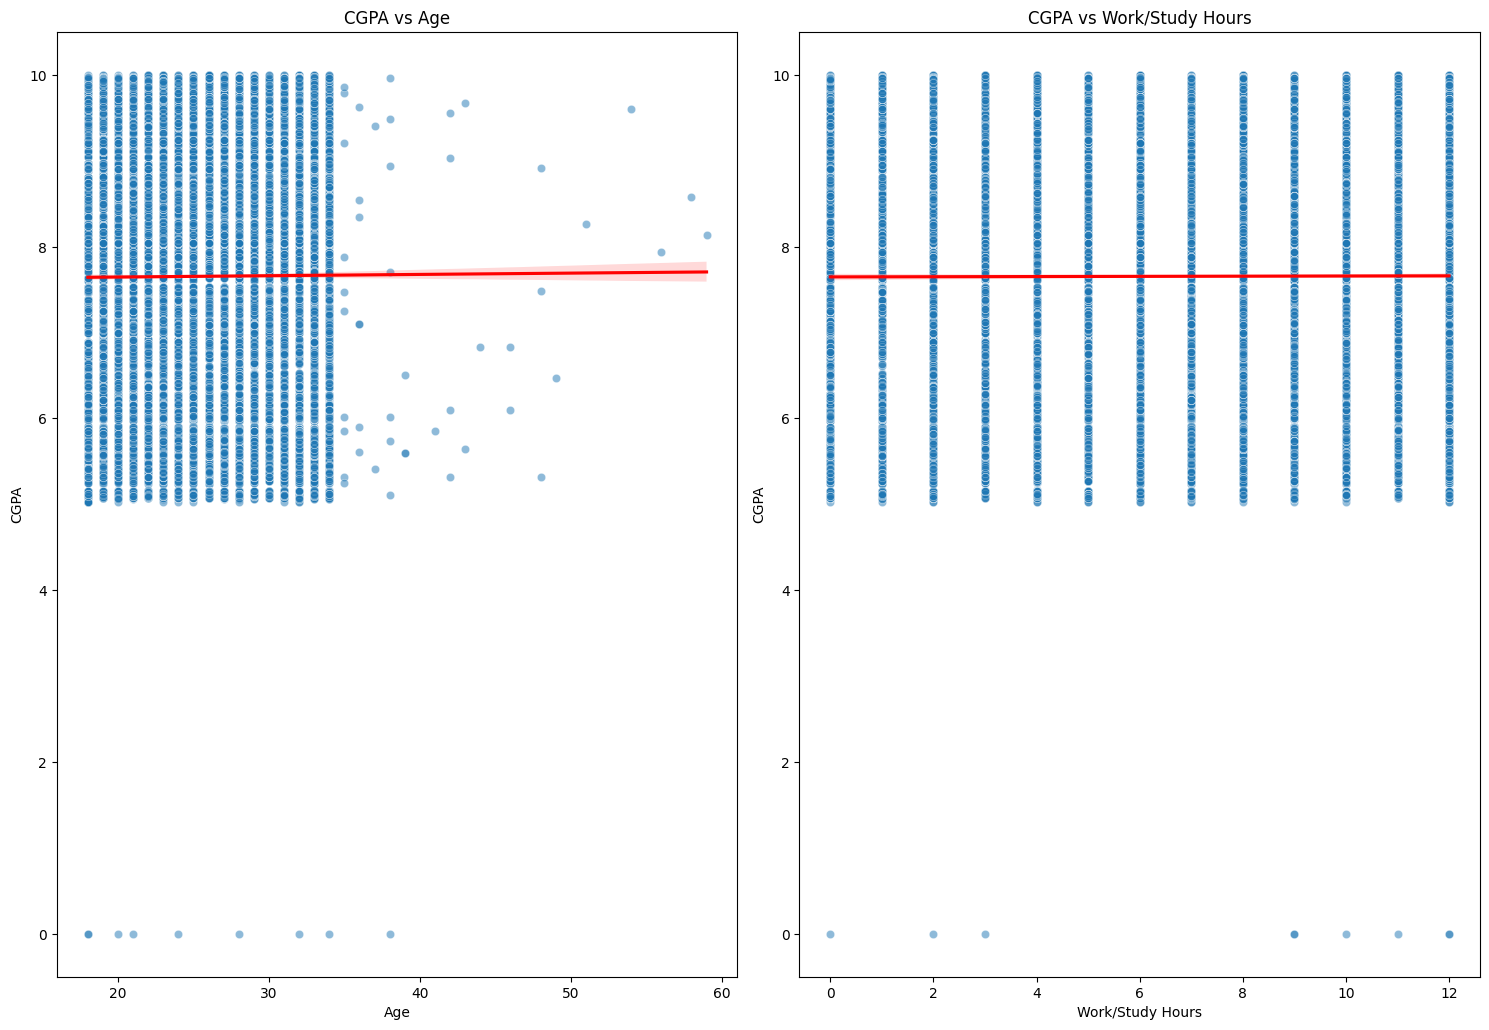

In [74]:
num_cols = ['Age', 'Work/Study Hours']

plt.figure(figsize=(15, 20))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//2+1, 2, i)
    sns.scatterplot(x=col, y="CGPA", data=df, alpha=0.5)
    sns.regplot(x=col, y="CGPA", data=df, scatter=False, color="red")
    plt.title(f"CGPA vs {col}")

plt.tight_layout()
plt.show()


Признаки, которые почти не влияют на CGPA (можно исключить):

Age — возраст почти не влияет на успеваемость.

Work/Study Hours — нет зависимости с CGPA.

City — различий по городам почти нет.

Profession — выбор профессии также не влияет.

Полезные категориальные признаки:

Gender — небольшие различия есть.

Sleep Duration — заметна связь: слишком мало сна или слишком много → хуже успеваемость.

Dietary Habits — питание влияет на CGPA (здоровое = выше баллы).

Degree — разные направления обучения дают разные уровни CGPA.

Have you ever had suicidal thoughts? — связь с более низким CGPA.

Financial Stress — чем выше стресс, тем ниже CGPA.

Family History of Mental Illness — заметна связь.

Depression — депрессия сильно влияет.

Полезные числовые признаки:

Academic Pressure — сильное влияние.

Work Pressure — влияет (при высоком давлении CGPA ниже).

Study Satisfaction — чем выше удовлетворённость, тем выше CGPA.

Job Satisfaction — тоже заметное влияние.

In [70]:
# заменить "?" в Financial Stress на NaN
df['Financial Stress'] = df['Financial Stress'].replace("?", np.nan)

# заполнение медианой (т.к. шкала числовая)
df['Financial Stress'] = df['Financial Stress'].astype(float)
df['Financial Stress'] = df['Financial Stress'].fillna(df['Financial Stress'].median())


In [76]:
categorial_features = ['Gender', 'Sleep Duration','Dietary Habits','Degree', 'Have you ever had suicidal thoughts ?','Financial Stress', 'Family History of Mental Illness', 'Depression','Academic Pressure','Study Satisfaction','Work Pressure','Job Satisfaction']
numeric_features = []
best_features = categorial_features + numeric_features

## Моделирование

**Общая задача:**
Сравнить несколько вариантов линейной регрессии на датасете (с предобработкой признаков: стандартизация числовых, OneHot/Label для категориальных).

**предобработка**
- Категориальные признаки преобразовать с помощью OneHotEncoder (если признак является типом **bool** по логике можно интерпретировать как (true, false) То можно LabelEncoder)
- Числовые признаки записать в `X_scaled` и провести стандартизацию с помощью `StandardScaler`. Желательно без категориальных признаков


---
**Метрики**: (MAE, MAPE, R², MSE, RMSE)

---

**Модель 1.**

- Использовать **все признаки (кроме y)**.
- Обучить на **всей выборке** (без разделения).
- Сделать предсказания на этой же выборке.
- Вывести метрики и интерпретировать.
- Построить график коэффициентов (model.coef\_ vs X\_scaled.columns) и интерпретировать.

---

**Модель 2.**

- Использовать **все признаки**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 3.**

- Использовать только **best\_features** (отобранные признаки).
- Обучить на **всей выборке**.
- Предсказать на всей выборке.
- Вывести метрики качества и интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 4.**

- Использовать **best\_features**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики качества для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

P.S.
- Важно не забывать о стандартизации и разделении категориальных признаков на отдельные олонки
- Все примеры есть в практике 2


P.S.S
Старайтесь делать собственные предположения, ChatGPT задачу решит, но вы не добьетесь понимания полученных результатов

---
В результате должно получиться 4 модели

- первые две на всех колонках (фичах)
- последующие на отобранных фичах (колонках)

## Ниже представлены подсказки, то что нужно использовать и как должно называться

### Преобразование категориальных

In [81]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Gender_encoded"] = le.fit_transform(df["Gender"]) #Male=1, Female=0
df["Have you ever had suicidal thoughts ?_encoded"] = le.fit_transform(df["Have you ever had suicidal thoughts ?"])
df["Family History of Mental Illness_encoded"] = le.fit_transform(df["Family History of Mental Illness"])

In [82]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(X[["YOU_VARIABLE_NAME"]])
X_encoded =
X = X.drop('YOU_VARIABLE_NAME', axis=1) if 'type' in X.columns else X
X = pd.concat([X, X_encoded], axis=1) if 'type_white' not in X.columns else X

SyntaxError: invalid syntax (ipython-input-1630313790.py, line 4)

In [86]:
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,...,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Gender_encoded,Have you ever had suicidal thoughts ?_encoded,Family History of Mental Illness_encoded
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,...,Healthy,B.Pharm,Yes,3.0,1.0,No,1,1,1,0
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,...,Moderate,BSc,No,3.0,2.0,Yes,0,0,0,1
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,...,Healthy,BA,No,9.0,1.0,Yes,0,1,0,1
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,...,Moderate,BCA,Yes,4.0,5.0,Yes,1,0,1,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,...,Moderate,M.Tech,Yes,1.0,1.0,No,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,...,Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0,0,1,1
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,...,Healthy,MSc,No,0.0,3.0,Yes,0,1,0,1
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,...,Unhealthy,MD,No,12.0,2.0,No,0,1,0,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,...,Healthy,'Class 12',Yes,10.0,5.0,No,1,0,1,0


In [87]:
from sklearn.preprocessing import OneHotEncoder

# список категориальных признаков (из EDA)
cat_cols = ['City','Sleep Duration', 'Dietary Habits','Degree']

# инициализация OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
# drop='first' → чтобы избежать дамми-ловушки (лишней колонки)

# применяем энкодер
encoded = encoder.fit_transform(X[cat_cols])

# превращаем в DataFrame
encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(cat_cols),
    index=X.index
)

# удаляем старые категориальные признаки и добавляем новые
X = X.drop(columns=cat_cols)
X = pd.concat([X, encoded_df], axis=1)

print("Размерность X после кодирования:", X.shape)
print(X.head())


KeyError: "None of [Index(['City', 'Sleep Duration', 'Dietary Habits', 'Degree'], dtype='object')] are in the [columns]"

In [ ]:
# https://habr.com/ru/articles/456294/ - виды Encoder для категориальных признаков
# LabelEncoder, OneHotEncoder
# Label для bool (0,1), (yes, no), (true, false)
# OneHot - для меток

from sklearn.preprocessing import OneHotEncoder # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

encoder = OneHotEncoder(sparse_output=False)  # sparse=False → выдаёт DataFrame, а не numpy матрицу
encoded = encoder.fit_transform(X[["YOU_VARIABLE_NAME"]])  # .fit_transfom(X) - обучить и трансформировать, т.е. вернуть результат

In [66]:
# https://habr.com/ru/articles/456294/ - виды Encoder для категориальных признаков
# LabelEncoder, OneHotEncoder
# Label для bool (0,1), (yes, no), (true, false)
# OneHot - для меток
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

# категориальные и числовые
categorical_features = ["Gender", "City", "Profession", "Sleep Duration",
                        "Dietary Habits", "Degree",
                        "Have you ever had suicidal thoughts ?",
                        "Financial Stress", "Family History of Mental Illness"]

numeric_features = [col for col in X.columns if col not in categorical_features]

# трансформатор: OneHot для категориальных, passthrough для числовых
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", sparse_output=False), categorical_features),
        ("num", "passthrough", numeric_features)
    ]
)

# применим трансформацию
X_encoded = preprocessor.fit_transform(X)

# превратим обратно в DataFrame с колонками
encoded_columns = list(preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_features)) + numeric_features



In [67]:
X_encoded =

In [ ]:
X = X.drop('YOU_VARIABLE_NAME', axis=1) if 'type' in X.columns else X # убираем базовую колонку type = [red, white]
X = pd.concat([X, X_encoded], axis=1) if 'type_white' not in X.columns else X # оставляем 2 разные колонки [type_red, type_white]

### Преобразование числовых

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # попробовать избавиться от категориальных. То ест не засовывать такие признаки в стандартизацию


### Модель

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# model.fit(X, y) - обучение
# model.predict(X) - предсказание y
# model.coef_ - коэфициенты фич (каждый коэф относится по индексу к своей фиче)

# для того, чтобы не запутаться используйте следующий нейминг
model1 = LinearRegression() # модель задачи 1
model2 = LinearRegression() # модель задачи 2
... # и так далее

### Разделение на обучающую, тестовую

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # Рездляем данные как 80% - обучение, 20% на тест